In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
import seaborn as sns

from sklearn.metrics import roc_curve, auc

In [40]:
# #from google.colab import drive
# drive.mount('/content/drive')
df = pd.read_csv("3.train.csv")
df_test = pd.read_csv("3.test.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df_test.drop(columns=["Unnamed: 0"], inplace=True)

In [41]:
X_train = df.drop(columns=['RainTomorrow'])
normalizer_X = StandardScaler()
normalizer_X.fit(X_train)
X_train = normalizer_X.fit_transform(X_train)
y_train = df['RainTomorrow']
y_train = y_train.values.ravel()

X_test = df_test.drop(columns=['RainTomorrow'])
X_test = normalizer_X.fit_transform(X_test)
y_test = df_test['RainTomorrow']
y_test = y_test.values.ravel()

In [42]:
def custom_loss_func(y_actual,y_prob):
    y_pred_proba = np.array(y_prob)
    y = np.array(y_actual)
    thresholds = np.linspace(0, 1, 101)
    max_earn = -1000000
    cost = np.array([[0,-900],[-100,400]])
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(float)
        cons = confusion_matrix(y, y_pred)
        test_earn = np.sum(cons * cost)
        if test_earn > max_earn:
            max_earn = test_earn

    return max_earn

custom_scorer = make_scorer(custom_loss_func, greater_is_better=True, needs_proba=True) #response_method="predict_proba")

In [43]:
# grid search on hidden layer size
param_grid = {
    "hidden_layer_sizes":[(10),(8,4),(20,10),(20,10,5),(40,20)],
    "activation":['logistic','relu'], 
    "solver":['sgd','adam'],
    "learning_rate":['constant','adaptive'],}

nn = MLPClassifier()

grid_search = GridSearchCV(nn, param_grid, scoring= custom_scorer, cv=5, n_jobs=-1,verbose=3)

# Fit the grid search
grid_search.fit(X_train, y_train.ravel())

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best custom score:', best_score)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 2/5] END activation=logistic, hidden_layer_sizes=10, learning_rate=constant, solver=sgd;, score=60500.000 total time=   3.4s
[CV 5/5] END activation=logistic, hidden_layer_sizes=10, learning_rate=constant, solver=sgd;, score=53000.000 total time=   3.5s
[CV 4/5] END activation=logistic, hidden_layer_sizes=10, learning_rate=constant, solver=sgd;, score=41700.000 total time=   3.7s
[CV 3/5] END activation=logistic, hidden_layer_sizes=10, learning_rate=constant, solver=sgd;, score=30100.000 total time=   3.9s
[CV 1/5] END activation=logistic, hidden_layer_sizes=10, learning_rate=constant, solver=sgd;, score=36100.000 total time=   4.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=10, learning_rate=constant, solver=adam;, score=136600.000 total time=   8.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=10, learning_rate=constant, solver=adam;, score=107200.000 total time=   8.3s
[CV 4/5] END activation=logisti

/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam;, score=148300.000 total time=  21.2s


/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam;, score=150400.000 total time=  21.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd;, score=-438300.000 total time=   8.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd;, score=-438300.000 total time=   8.7s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam;, score=146000.000 total time=  19.8s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam;, score=173000.000 total time=  16.4s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam;, score=130000.000 total time=  22.8s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd;, score=-438200.000 total time=   8.7s
[CV 1/5] END activation

/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam;, score=145300.000 total time=  26.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd;, score=27800.000 total time=  22.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=constant, solver=sgd;, score=47100.000 total time=  11.5s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam;, score=156800.000 total time=  18.7s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=constant, solver=sgd;, score=64100.000 total time=  10.5s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam;, score=154500.000 total time=  19.9s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=constant, solver=sgd;, score=29700.000 total time=  11.3s
[CV 2/5] END activation=logistic, hid

/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=constant, solver=adam;, score=165600.000 total time=  31.5s


/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=constant, solver=adam;, score=184900.000 total time=  31.6s


/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=constant, solver=adam;, score=156200.000 total time=  32.3s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=constant, solver=adam;, score=123800.000 total time=  31.9s


/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=constant, solver=adam;, score=191400.000 total time=  31.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=10, learning_rate=constant, solver=sgd;, score=73400.000 total time=   2.7s
[CV 2/5] END activation=relu, hidden_layer_sizes=10, learning_rate=constant, solver=sgd;, score=89400.000 total time=   3.7s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=sgd;, score=46800.000 total time=  19.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=10, learning_rate=constant, solver=sgd;, score=53000.000 total time=   3.5s
[CV 4/5] END activation=relu, hidden_layer_sizes=10, learning_rate=constant, solver=sgd;, score=56200.000 total time=   3.0s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=sgd;, score=43500.000 total time=  19.7s
[CV 5/5] END activation=relu, hidden_layer_sizes=10, learning_rate=constant, solver=sgd;, sco

/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=adam;, score=181800.000 total time=  32.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=adam;, score=189600.000 total time=  31.7s
[CV 1/5] END activation=relu, hidden_layer_sizes=10, learning_rate=adaptive, solver=sgd;, score=112300.000 total time=   7.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=10, learning_rate=adaptive, solver=sgd;, score=76900.000 total time=   7.9s
[CV 2/5] END activation=relu, hidden_layer_sizes=10, learning_rate=adaptive, solver=sgd;, score=82100.000 total time=   8.4s


/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=adam;, score=158000.000 total time=  31.9s


/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=adam;, score=190200.000 total time=  32.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=10, learning_rate=adaptive, solver=adam;, score=128300.000 total time=   5.1s


/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=adam;, score=142300.000 total time=  32.5s
[CV 5/5] END activation=relu, hidden_layer_sizes=10, learning_rate=adaptive, solver=sgd;, score=108200.000 total time=   7.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=10, learning_rate=adaptive, solver=sgd;, score=74300.000 total time=   7.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=10, learning_rate=adaptive, solver=adam;, score=131900.000 total time=   4.7s
[CV 3/5] END activation=relu, hidden_layer_sizes=10, learning_rate=adaptive, solver=adam;, score=101300.000 total time=   5.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=10, learning_rate=adaptive, solver=adam;, score=99800.000 total time=   6.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(8, 4), learning_rate=constant, solver=sgd;, score=82000.000 total time=   5.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=10, learning_rate=adaptive, solver=adam;, score=147500

/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=sgd;, score=153200.000 total time=  20.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(40, 20), learning_rate=constant, solver=adam;, score=143400.000 total time=  27.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=sgd;, score=142300.000 total time=  21.0s


/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(40, 20), learning_rate=constant, solver=adam;, score=168000.000 total time=  26.8s
[CV 4/5] END activation=relu, hidden_layer_sizes=(40, 20), learning_rate=constant, solver=adam;, score=109200.000 total time=  26.1s
[CV 3/5] END activation=relu, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=sgd;, score=101800.000 total time=  21.8s
[CV 4/5] END activation=relu, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=sgd;, score=112900.000 total time=  18.6s
[CV 5/5] END activation=relu, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=sgd;, score=169700.000 total time=  21.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=adam;, score=132200.000 total time=  16.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(40, 20), learning_rate=adaptive, solver=adam;, score=128100.000 total time=  16.7s
[CV 4/5] END activation=relu, hidden_layer_sizes=(40, 20), learning_rate

/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
best_hidden_layer_sizes = grid_search.best_params_['hidden_layer_sizes']
best_activation = grid_search.best_params_['activation']
best_optimizer = grid_search.best_params_['solver']
best_learning_rate = grid_search.best_params_['learning_rate']

nn = MLPClassifier(hidden_layer_sizes = best_hidden_layer_sizes,
                   activation = best_activation,
                   solver = best_optimizer,
                   learning_rate = best_learning_rate) 

nn.fit(X_train, y_train)

y_probs = nn.predict_proba(X_test)[:,1]

/Users/ender_yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
net_val_vec = np.array([])
cost = np.array([[0,-900],[-100,400]])

# Since grid search do not return the best threshhole, we need to find it manually.
thresholds = np.linspace(0, 1, 101)
for thresh_i in thresholds: #for loop
    # define new y_pred vector using custom threshold
    y_pred = np.where(y_probs >= thresh_i, 1, 0)
    # calculate the net value obtained
    cm = confusion_matrix(y_test, y_pred)
    net_val = np.sum(cm * cost)
    net_val_vec = np.append(net_val_vec, net_val)

max_val = np.amax(net_val_vec) # max value
max_val_idx = np.argmax(net_val_vec[::]) # index of max value (location)

print("Max value =", max_val, '|', " Best probability Threshold =", thresholds[max_val_idx])

Max value = 240700.0 |  Best probability Threshold = 0.65


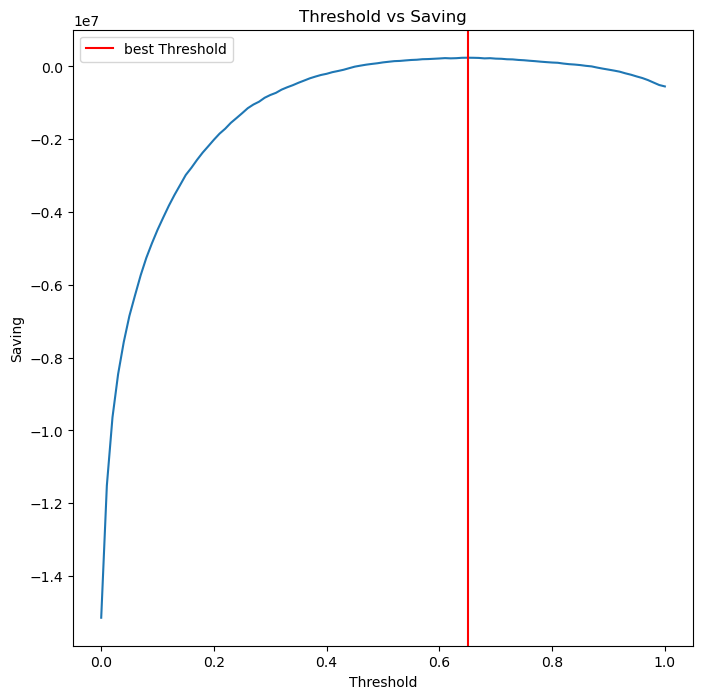

In [46]:
fig,ax = plt.subplots(figsize=(8, 8))
plt.xlabel('Threshold')
plt.ylabel('Saving')
ax.set_title("Threshold vs Saving")
plt.plot(thresholds, net_val_vec)
plt.axvline(x = thresholds[max_val_idx], color = 'r', label = 'best Threshold')
plt.legend()
plt.show()

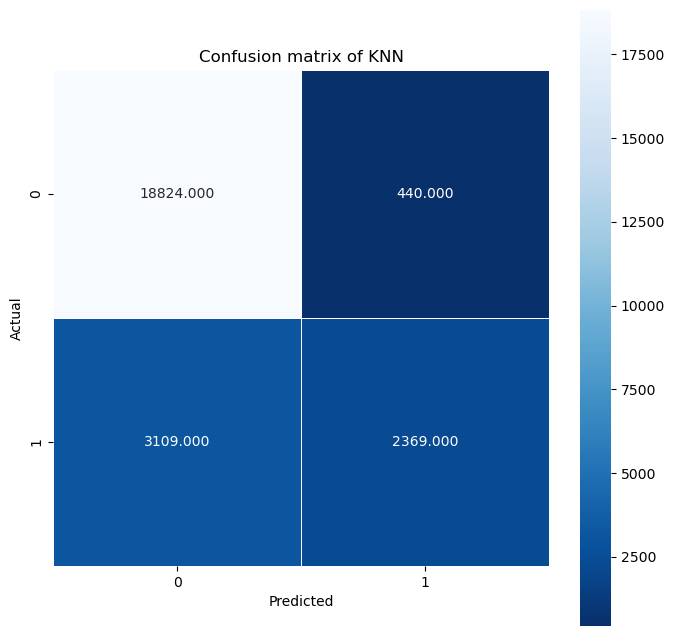

In [47]:
# plot the confusion matrix
y_pred = np.where(y_probs >= thresholds[max_val_idx], 1, 0)
confusion_plot = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots(figsize=(8, 8))
ax.set_title("Confusion matrix of KNN")
sns.heatmap(confusion_plot, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
# print the accuracy, precision, recall, f1-score
acc = (confusion_plot[0][0] + confusion_plot[1][1]) / (confusion_plot[0][0] + confusion_plot[1][1] + confusion_plot[0][1] + confusion_plot[1][0])
print("Accuracy: ", acc)
pre = confusion_plot[1][1] / (confusion_plot[1][1] + confusion_plot[0][1])
print("Precision: ", pre)
recall = confusion_plot[1][1] / (confusion_plot[1][1] + confusion_plot[1][0])
print("Recall: ", recall)
f1_score = 2 * pre * recall / (pre + recall)
print("F1-score: ", f1_score)

Accuracy:  0.856559696063374
Precision:  0.8433606265574938
Recall:  0.4324571011317999
F1-score:  0.5717388681066731


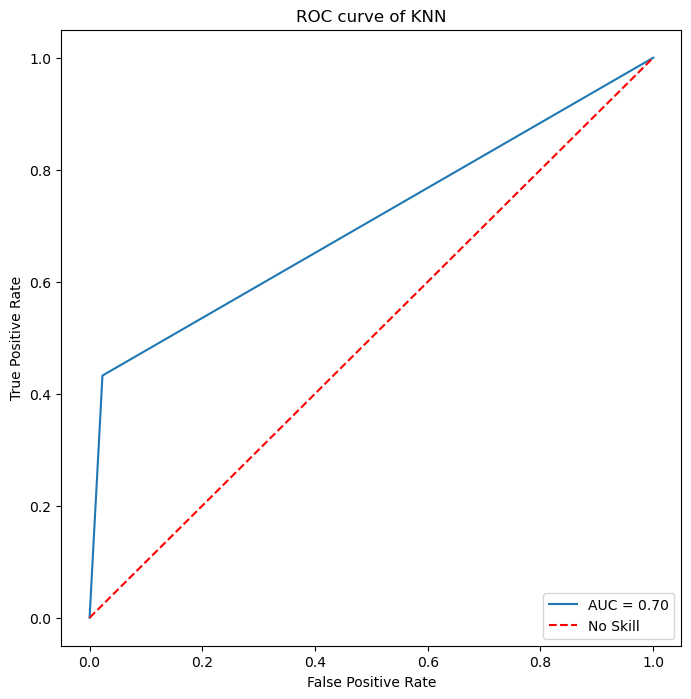

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
fig,ax = plt.subplots(figsize=(8, 8))
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
ax.set_title("ROC curve of KNN")
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--',label = 'No Skill')
plt.legend(loc = 'lower right')
plt.show()